<h2>EBA3400 Exercise Set 10: Visualization with Pandas</h2>

<h3>10.1 Visualizing Pokemons!</h3>

In this exercise we will work with a dataset containing information on all 802 Pokemon from all seven generations of Pokemon. The data contains the following variables 

- name: The English name of the Pokemon
- japanese_name: The Original Japanese name of the Pokemon
- pokedex_number: The entry number of the Pokemon in the National Pokedex
- percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.
- type1: The Primary Type of the Pokemon
- type2: The Secondary Type of the Pokemon
- classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex
- height_m: Height of the Pokemon in metres
- weight_kg: The Weight of the Pokemon in kilograms
- capture_rate: Capture Rate of the Pokemon
- base_egg_steps: The number of steps required to hatch an egg of the Pokemon
- abilities: A stringified list of abilities that the Pokemon is capable of having
- experience_growth: The Experience Growth of the Pokemon
- base_happiness: Base Happiness of the Pokemon
- against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type
- hp: The Base HP of the Pokemon
- attack: The Base Attack of the Pokemon
- defense: The Base Defense of the Pokemon
- sp_attack: The Base Special Attack of the Pokemon
- sp_defense: The Base Special Defense of the Pokemon
- speed: The Base Speed of the Pokemon
- generation: The numbered generation which the Pokemon was first introduced
- is_legendary: Denotes if the Pokemon is legendary.

More information on this dataset can be found on Kaggle.com. You are asked to do the following

- A Import the data (pokemon.csv)
- B Pick relevant data for this exercise. We will focus on 'name', 'type1', 'height_m', 'weight_kg', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'generation' and 'is_legendary'.
- C Create univariate charts showing the frequency of Pokemon by type, HP and weight. What kind of chart do you recommend in each case and why?
- D Create a scatterplot with weight and height on the axis. Is there a correlation between height and weight?
- E Create a scatterplot with attacking ability and defensive ability on the axis. Is there a correlation between attacking and defending? Does a hexplot tell the same story?
- F What is the average attack scores for legendary and non-legendary Pokemon in Generation 1?
- G Create a line chart shoiwing lines for average HP, Attack, Defense, Special Attack, Special Defence and Speed across generations

<h4>Part A/B</h4>

In [1]:
import pandas as pd
pokemon = pd.read_csv('C:/Users/power/OneDrive/Documents/Programming/Data/pokemon.csv')
pokemon = pokemon [['name', 'type1', 'height_m', 'weight_kg', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'generation', 'is_legendary']]
pokemon.head(5)

,name,type1,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed,generation,is_legendary
0,Bulbasaur,grass,0.7,6.9,45,49,49,65,65,45,1,0
1,Ivysaur,grass,1.0,13.0,60,62,63,80,80,60,1,0
2,Venusaur,grass,2.0,100.0,80,100,123,122,120,80,1,0
3,Charmander,fire,0.6,8.5,39,52,43,60,50,65,1,0
4,Charmeleon,fire,1.1,19.0,58,64,58,80,65,80,1,0


<h4>Part C</h4>

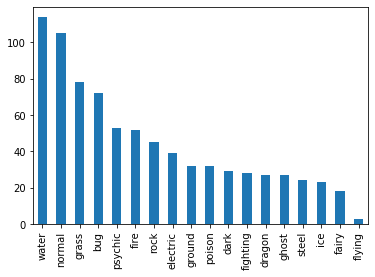

In [8]:
pokemon['type1'].value_counts().plot.bar()

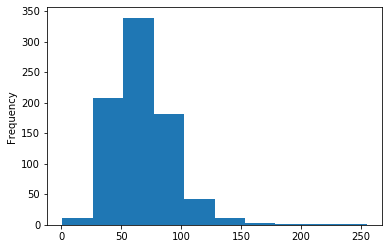

In [11]:
pokemon['hp'].plot.hist()

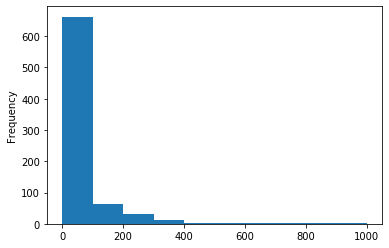

In [12]:
pokemon['weight_kg'].plot.hist()

In [13]:
pokemon[pokemon['weight_kg']>500]

,name,type1,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed,generation,is_legendary
375,Metagross,steel,1.6,550.0,80,145,150,105,110,110,3,0
382,Groudon,ground,3.5,950.0,100,180,160,150,90,90,3,1
482,Dialga,steel,5.4,683.0,100,120,120,150,100,90,4,1
486,Giratina,ghost,4.5,750.0,150,120,100,120,100,90,4,1
712,Avalugg,ice,2.0,505.0,95,117,184,44,46,28,6,0
749,Mudsdale,ground,2.5,920.0,100,125,100,55,85,35,7,0
789,Cosmoem,psychic,0.1,999.9,43,29,131,29,131,37,7,1
796,Celesteela,steel,9.2,999.9,97,101,103,107,101,61,7,1
798,Guzzlord,dark,5.5,888.0,223,101,53,97,53,43,7,1


<h4>Part D</h4>

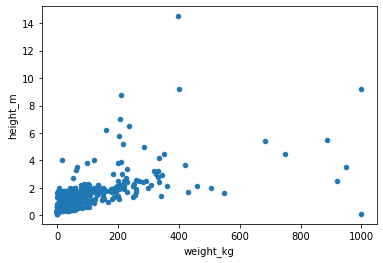

In [14]:
pokemon.plot.scatter(y='height_m', x='weight_kg')

<h4>Part E</h4>

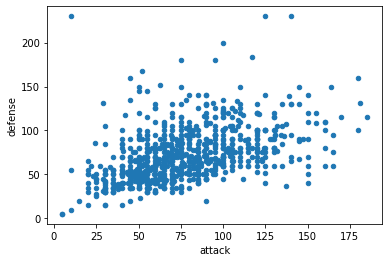

In [15]:
pokemon.plot.scatter(y='defense',x='attack')

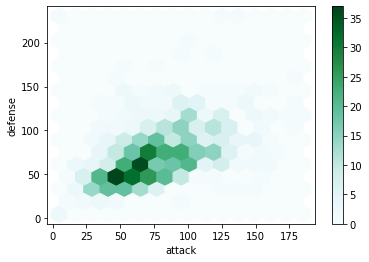

In [16]:
pokemon.plot.hexbin(y='defense', x='attack', gridsize=15,sharex=False)

<h4>Part F</h4>

In [17]:
id_leg = (pokemon['generation']==1) & (pokemon['is_legendary']==1)
id_non = (pokemon['generation']==1) & (pokemon['is_legendary']==0)
leg = pokemon[id_leg]
non = pokemon[id_non]
print('Average attack legendary Pokemon:',leg['attack'].mean())
print('Average attack non-legendary Pokemon:',non['attack'].mean())

Average attack legendary Pokemon: 105.0
Average attack non-legendary Pokemon: 73.48630136986301


<h4>Part G</h4>

In [20]:
stats = pokemon[['generation', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].copy()
gen_stats = stats.groupby(['generation']).mean()
#computing the mean of all data by generation 

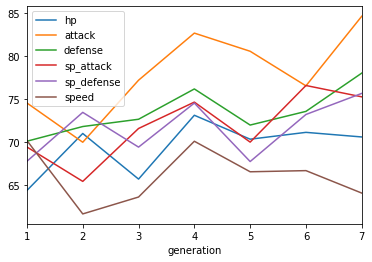

In [21]:
gen_stats.plot.line()